<h2 style="color:crimson;">5. Write a program to perform Exploratory Data Analysis on real time datasets using the
following approaches:</h2>
<h5>a) Univariate Analysis</h5>
<h5>b) Multivariate Analysis</h5>
<h5>c) Visualization using correlation matrix</h5>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
data=pd.read_csv("Fires_data.csv")
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


In [3]:
data.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

<h3>Univariate and its visualizations</h3>

In [5]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
new_cols=[]
for ele in list(data.columns):
    new_cols.append(ele.strip())
new_cols

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [7]:
data.columns=new_cols
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
data.Temperature.mean()

31.18032786885246

In [9]:
data.Temperature.median()

31.0

In [10]:
data.Temperature.mode()

0    31
dtype: int64

In [11]:
data.Temperature.std()

3.320401233951029

In [12]:
data.Temperature.value_counts()

31    18
35    15
32    14
33    13
29    11
30    10
36     9
28     7
34     7
25     6
26     4
27     4
22     2
24     1
37     1
Name: Temperature, dtype: int64

In [13]:
data['Classes'].value_counts()

not fire       60
fire           53
fire            4
not fire        2
fire            2
not fire        1
Name: Classes, dtype: int64

In [14]:
def clean(ele):
    return ele.strip()

In [15]:
data['Classes']=data['Classes'].apply(clean)

In [16]:
data.Classes.value_counts()

not fire    63
fire        59
Name: Classes, dtype: int64

In [17]:
# year_temp=pd.DataFrame({"year":data.year,
#                         "temp":data.Temperature})
# year_temp

In [18]:
# plt.scatter(data.year,data.Temperature,marker='o',color='y',linestyle='--')
data.year.max(),data.year.min()

(2012, 2012)

(20.0, 40.0)

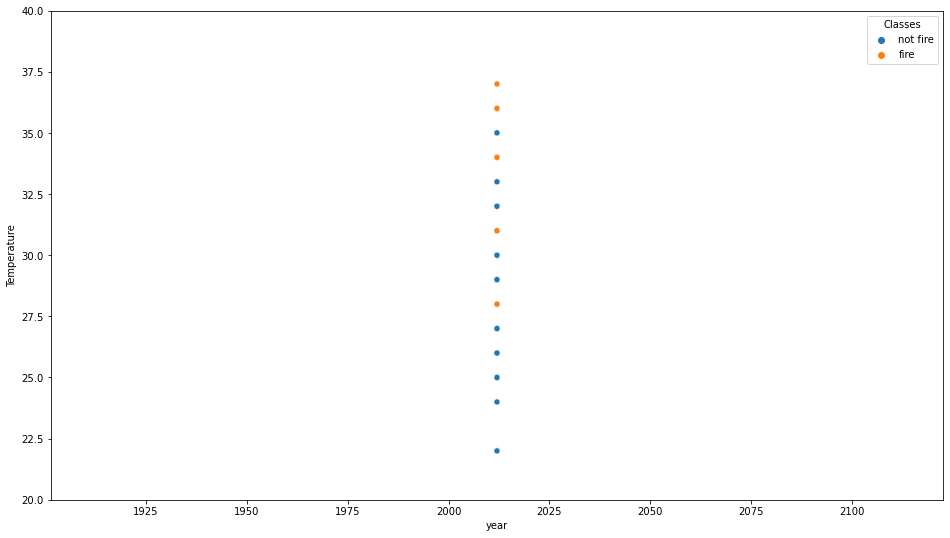

In [19]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=data,x="year",y="Temperature",marker='o',color='y',hue="Classes")
# plt.xlim([2010, 2021])
plt.ylim([20, 40])

<AxesSubplot:>

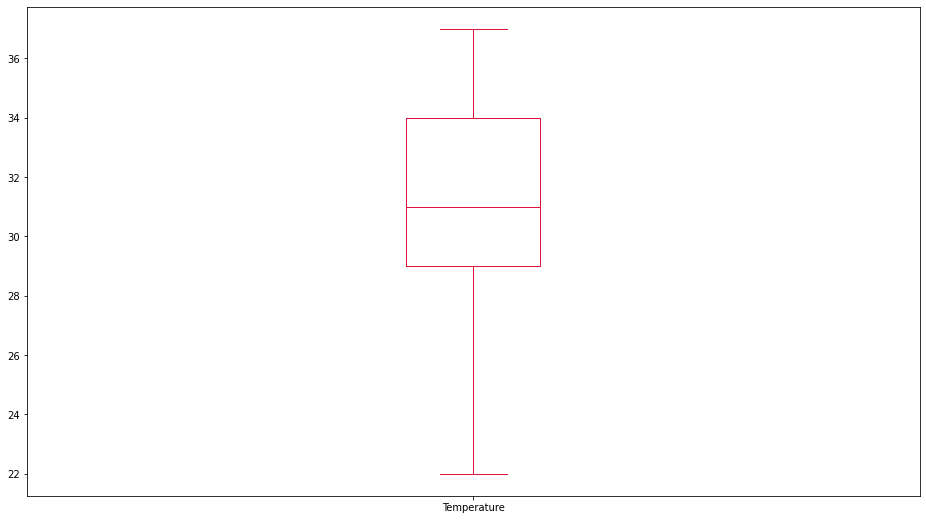

In [20]:
plt.figure(figsize=(16,9))
data.boxplot(column=['Temperature'],grid=False,color='crimson')

<h3>Bi-variate</h3>

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

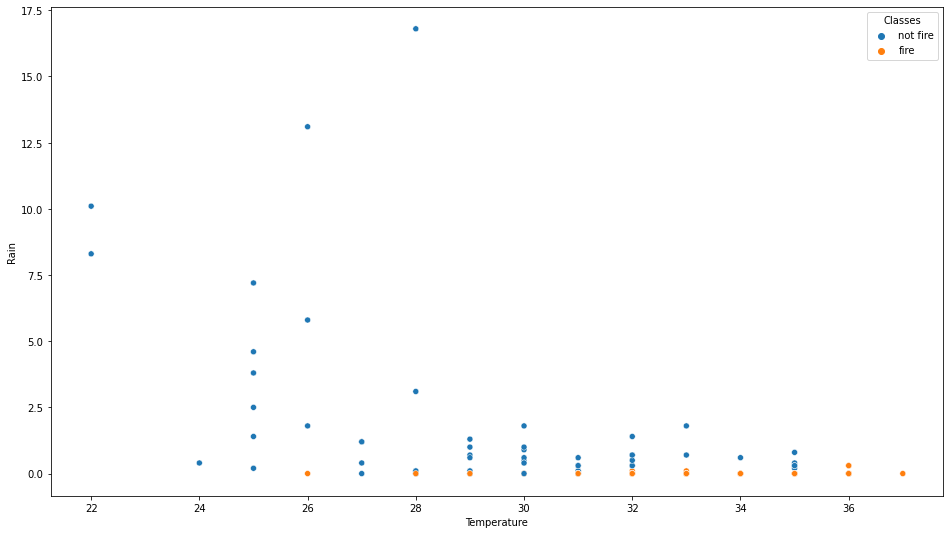

In [21]:
plt.figure(figsize=(16,9))
sns.scatterplot(x="Temperature",y="Rain",data=data,hue='Classes')

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

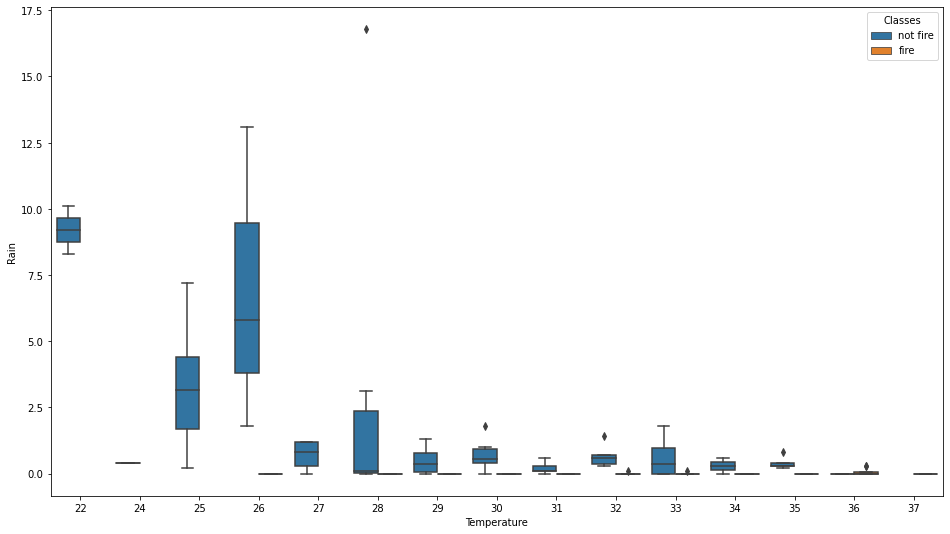

In [22]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Temperature",y="Rain",data=data,hue='Classes')

<AxesSubplot:xlabel='Temperature', ylabel='count'>

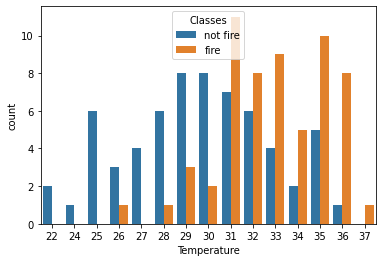

In [23]:
sns.countplot(x="Temperature",data=data,hue='Classes')

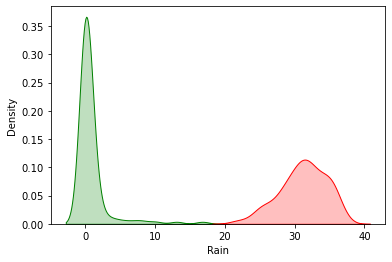

In [24]:
res = sns.kdeplot(data.Rain,color='green',shade=True)
res1 = sns.kdeplot(data.Temperature,color='red',shade=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


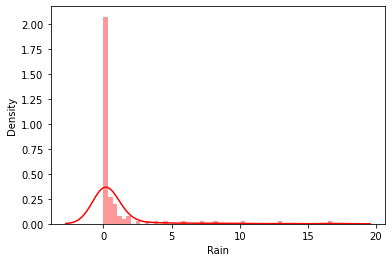

In [25]:
res2 = sns.distplot(data['Rain'],color="red")
plt.show()

In [26]:
data.Temperature.mode()

0    31
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


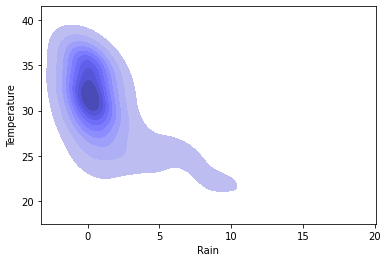

In [27]:
res2 = sns.kdeplot(data['Rain'],data['Temperature'],color='blue',shade=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


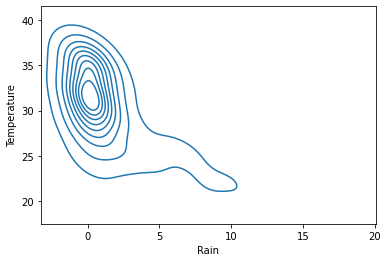

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


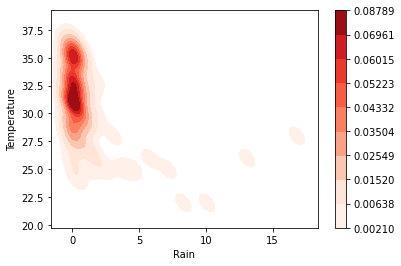

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


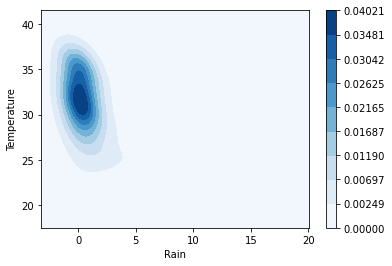

In [28]:
sns.kdeplot(data['Rain'],data['Temperature'])
plt.show()
 
# Custom the color, add shade and bandwidth
sns.kdeplot(data['Rain'],data['Temperature'], cmap="Reds", shade=True, bw_adjust=.5,cbar=True)
plt.show()

# Add thresh parameter
sns.kdeplot(data['Rain'],data['Temperature'], cmap="Blues", shade=True, thresh=0,cbar=True)
plt.show()

In [29]:
# fig = plt.figure(figsize=(16,9))
# ax = fig.add_subplot( projection = '3d')
# sns.kdeplot(data['Rain'],data['Temperature'], cmap="Blues", shade=True,cbar=True)
# plt.show()

<h3>Multivariate Analysis and visualisations</h3>

In [30]:
numerics = ['int16', 'int32', 'int64']
df = data.select_dtypes(include=numerics)
df["Classes"]=data["Classes"]
df

<ipython-input-30-6fee1c74c555>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Classes"]=data["Classes"]


,day,month,year,Temperature,RH,Ws,Classes
0,1,6,2012,29,57,18,not fire
1,2,6,2012,29,61,13,not fire
2,3,6,2012,26,82,22,not fire
3,4,6,2012,25,89,13,not fire
4,5,6,2012,27,77,16,not fire
...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,not fire
118,27,9,2012,31,66,11,fire
119,28,9,2012,32,47,14,not fire
120,29,9,2012,26,80,16,not fire


In [31]:
df.drop(columns=["day","month","year"],inplace=True)
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Temperature,RH,Ws,Classes
0,29,57,18,not fire
1,29,61,13,not fire
2,26,82,22,not fire
3,25,89,13,not fire
4,27,77,16,not fire
...,...,...,...,...
117,31,54,11,not fire
118,31,66,11,fire
119,32,47,14,not fire
120,26,80,16,not fire


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


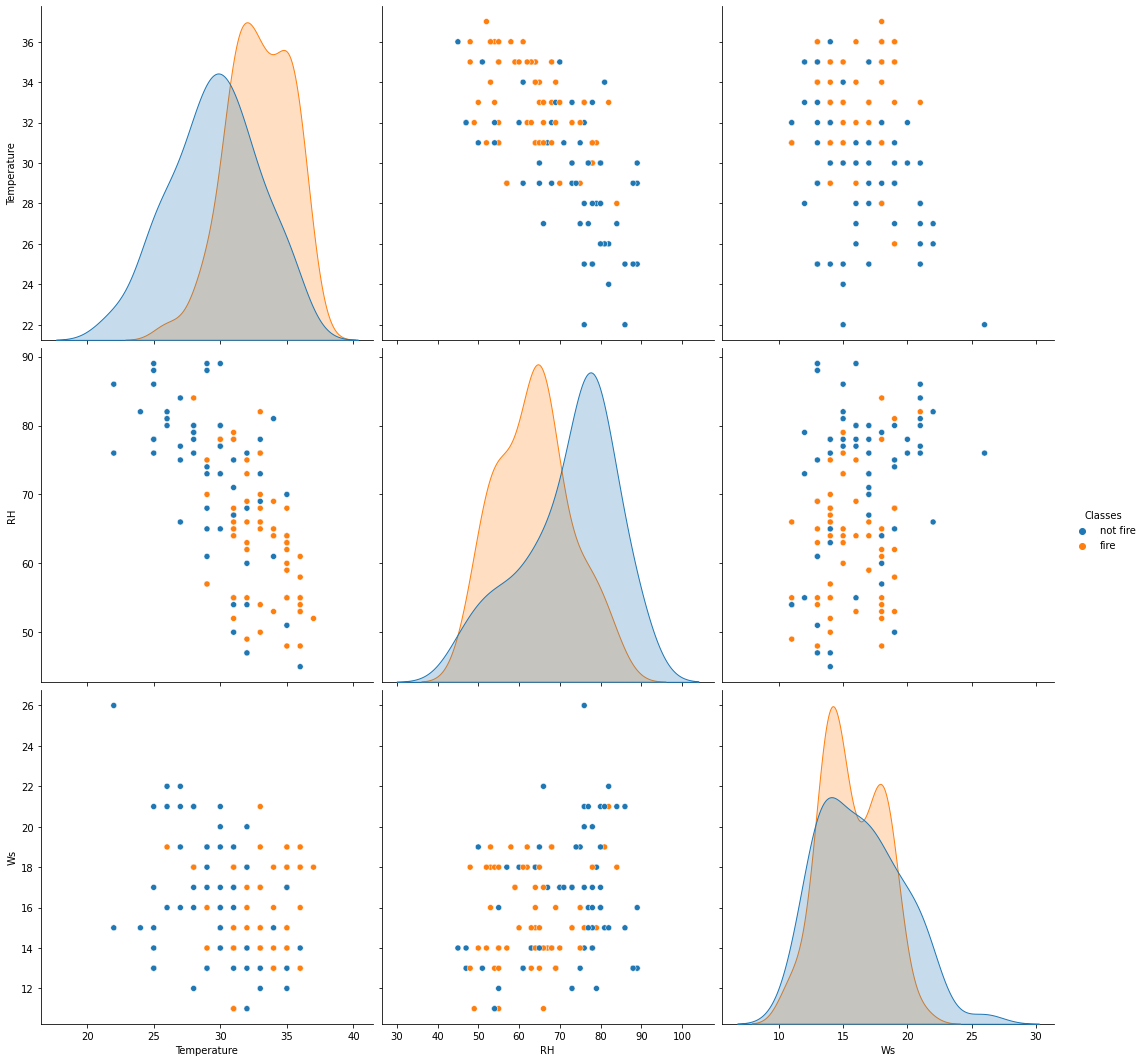

In [32]:
sns.pairplot(df,hue="Classes",size=5)

<AxesSubplot:>

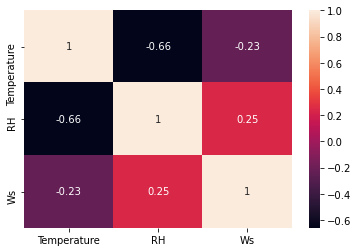

In [33]:
sns.heatmap(df.corr(),annot=True)